In [32]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Ana Sofia Del Rio
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [33]:
#Definimos la función
def five_point_derivative(f, x, h):
  '''
    Calcula la derivada de 5 puntos para una función f en un conjunto de puntos x con paso h.

    Parámetros:
    - f: función a derivar.
    - x: array de puntos donde evaluar la derivada.
    - h: paso entre puntos en el array x.

    Retorna:
    - Array de las derivadas aproximadas en cada punto de x.
  '''
  n = len(x)  # Número de puntos
  fprime = np.zeros_like(x)  # Array para almacenar las derivadas

  for i in range(n):
    if i == 0:
      # Derivada adelantada para el primer punto
      fprime[i] = (-25 * f(x[i]) + 48 * f(x[i] + h) - 36 * f(x[i] + 2 * h) + 16 * f(x[i] + 3 * h) - 3 * f(x[i] + 4 * h) )  / (12 * h)
    elif i == n - 1:
      # Derivada atrasada para el último punto
      fprime[i] = (25 * f(x[i]) - 48 * f(x[i] - h) + 36 * f(x[i] - 2 * h) - 16 * f(x[i] - 3 * h)  +3 * f(x[i] - 4 * h) )  / (12 * h)
    else:
      # Derivada centrada para los puntos intermedios
      fprime[i] = (f(x[i] - 2 * h) - 8 * f(x[i] - h) + 8 * f(x[i] + h) - f(x[i] + 2 * h)) / (2 * h)

  return fprime

El valor de la derivada de f(x)=cos(x)  utilizando un arreglo con 10 datos  [0≤x≤2π] es[ 3.31255132e-06 -3.85671282e+00 -5.90882685e+00 -5.19613512e+00
 -2.05211403e+00  2.05211403e+00  5.19613512e+00  5.90882685e+00
  3.85671282e+00 -3.31255132e-06]


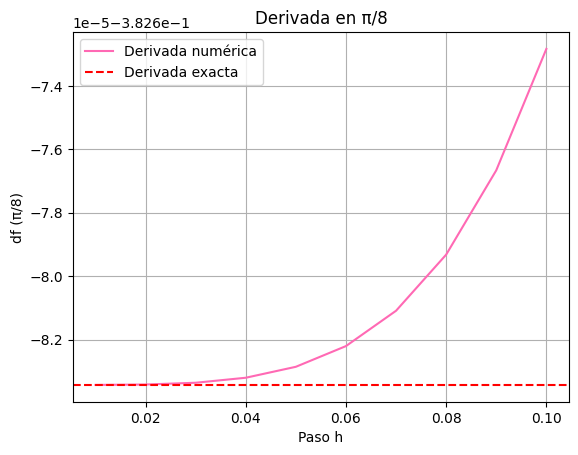

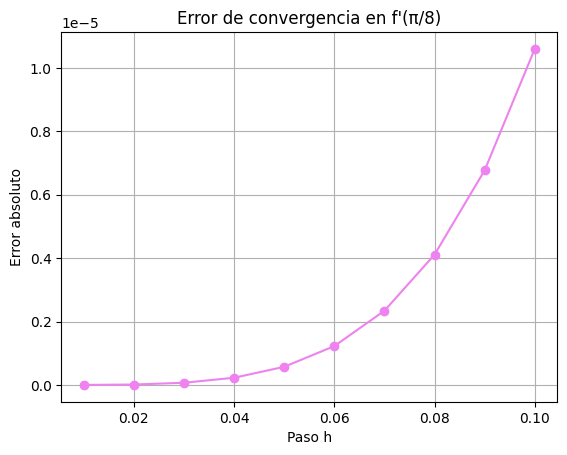

In [34]:
#Calculamos el valor para cos(x)
f = lambda x: np.cos(x)
df = lambda x: -np.sin(x)
x = np.linspace(0, 2 * np.pi,10)
h = 0.1
fprime = five_point_derivative(f, x, h)
print(f'El valor de la derivada de f(x)=cos(x)  utilizando un arreglo con 10 datos  [0≤x≤2π] es{fprime}')

#Para x= π/8
x_= np.array([np.pi/8])
h_vals= np.linspace(0.01, 0.1, 10)
fprime_exact = df(x_)
fprime_vals = []
error_= []
for h in h_vals:
  fprime_ = five_point_derivative(f, x_, h)
  fprime_vals.append(fprime_[0])
  fprime_exact = df(x_)
  error = np.abs(fprime_ - fprime_exact)
  error_.append(error[0])

plt.plot(h_vals, fprime_vals, '-', label='Derivada numérica', color='hotpink')
plt.axhline(fprime_exact, color='red', linestyle='--', label='Derivada exacta')
plt.xlabel('Paso h')
plt.ylabel('df (π/8)')
plt.title('Derivada en π/8')
plt.grid()
plt.legend()
plt.show()
# Gráfica del error vs h
plt.plot(h_vals, error_, 'o-', color='violet')
plt.xlabel('Paso h')
plt.ylabel('Error absoluto')
plt.title('Error de convergencia en f\'(π/8)')
plt.grid()
plt.show()

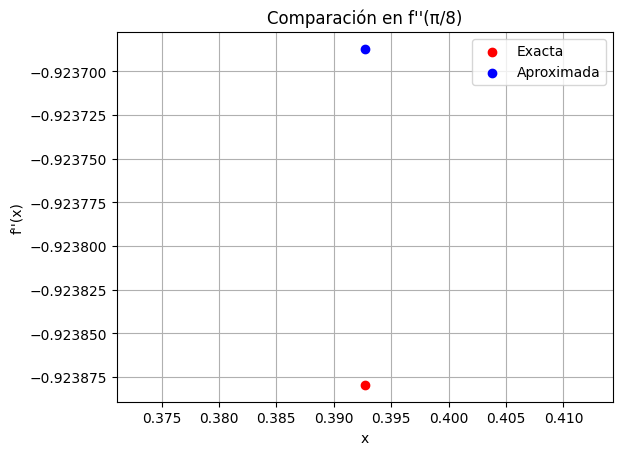

El error de la segunda derivada es: 0.00019245886379248844


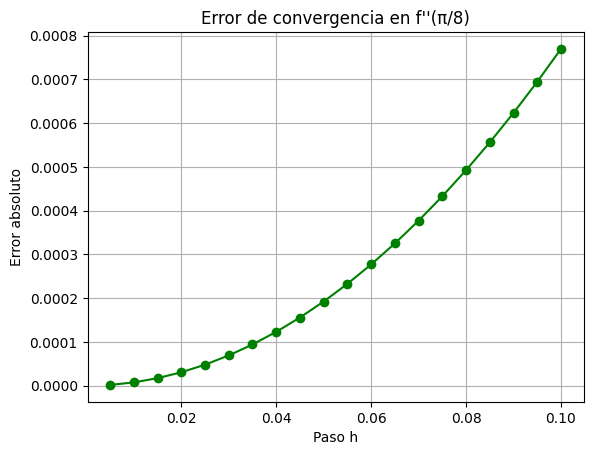

In [35]:
#Determinamos la segunda derivada
def second_diff(f, x, h):
  '''
  Aproxima la segunda derivada de f en x usando la diferencia finita centrada.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: segunda derivada de f en x
  '''
  return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)

h= 0.05
x = np.pi/8
f = lambda x: np.cos(x)
y = f(x)

#Derivada exacta
df2_exacta = lambda x: -np.cos(x)
# Segunda derivada por diferencias finitas
dy2 = second_diff(f, x, h)

plt.scatter(x, df2_exacta(x), color='red', label='Exacta')
plt.scatter(x, dy2, color='blue', label='Aproximada')
plt.title('Comparación en f\'\'(π/8)')
plt.xlabel('x')
plt.ylabel('f\'\'(x)')
plt.legend()
plt.grid()
plt.show()

error = abs(dy2 - df2_exacta(x))
print(f'El error de la segunda derivada es: {error}')

#Aunque es pequeño si existe un error

#Si variamos el h:

x = np.array([np.pi / 8])

# Valores de h
h_vals = np.linspace(0.005, 0.1, 20)
errors = []

# Cálculo de errores
for h in h_vals:
    approx = second_diff(f, x, h)
    exact = df2_exacta(x)
    error = np.abs(approx - exact)
    errors.append(error)

# Graficar el error vs h
plt.plot(h_vals, errors, 'o-', color='green')
plt.title('Error de convergencia en f\'\'(π/8)')
plt.xlabel('Paso h')
plt.ylabel('Error absoluto')
plt.grid()
plt.show()

#Se puede ver que entre más pequeño el h hay menos error de convergengia

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

In [36]:
#Utilizamos las funciones vistas en clase para calcular las diferencias finitas
def forward_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita hacia adelante.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita hacia atrás.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x) - f(x - h)) / h

def centered_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita centrada.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x + h) - f(x - h)) / (2 * h)

In [37]:
#Función de diferencias finitas
def Diferencias_Finitas(f, h):
  '''
  Calcula la primera derivada de f usando las diferencias finitas.
  f: función
  h: paso de discretización
  return: primera derivada de f usando las diferencias finitas (función)
  '''
  def Derivada(x):
    '''
    Calcula la primera derivada de f en x usando las diferencias finitas.
    x: punto en el que se quiere calcular la derivada
    return: primera derivada de f en x
    '''
    n = len(x)
    fprime = np.zeros_like(x, dtype=float) # Crea un array para guardar los datos
    for i in range(n):
      if i == 0: # Condicion para el primer punto
        fprime[i] = forward_diff(f, x[i], h)
      elif i == n-1: # Condición para el último punto
        fprime[i] = backward_diff(f, x[i], h)
      else:
        fprime[i] = centered_diff(f, x[i], h) # Diferencias centradas
    return fprime

  return Derivada

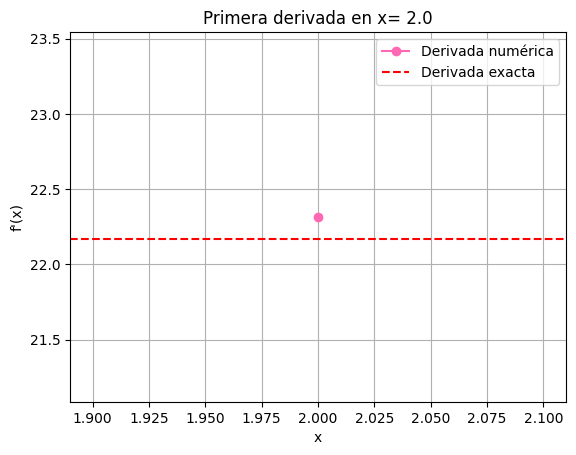

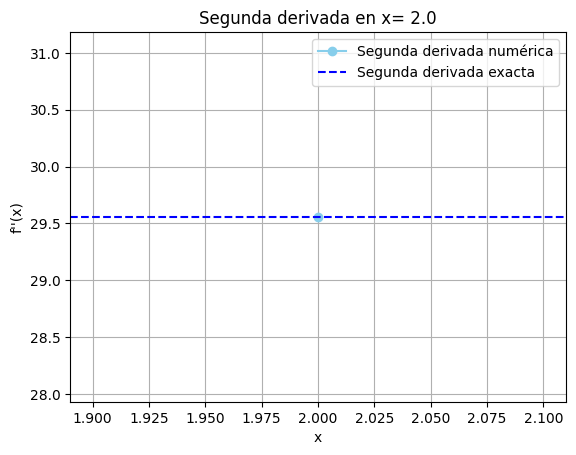

In [38]:
#Derivada en x = 2.0
f = lambda x: x * np.exp(x)
df_exacta = lambda x: np.exp(x) + x * np.exp(x)
df2_exacta = lambda x: 2 * np.exp(x) + x * np.exp(x)
x = np.array([2.0])
h = 0.01

df_num = Diferencias_Finitas(f, h)
df_num = df_num(x)

d2f_num = second_diff(f, x, h)

df_exacta_vals = df_exacta(x)
df2_exacta_vals = df2_exacta(x)
#Primera derivada
plt.plot(x, df_num, 'o-', label='Derivada numérica', color='hotpink')
plt.axhline(df_exacta_vals, color='red', linestyle='--', label='Derivada exacta')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.title('Primera derivada en x= 2.0')
plt.grid()
plt.legend()
plt.show()

#Segunda derivada
plt.plot(x, d2f_num, 'o-', label='Segunda derivada numérica', color='skyblue')
plt.axhline(df2_exacta_vals, color='blue', linestyle='--', label='Segunda derivada exacta')
plt.xlabel('x')
plt.ylabel('f\'\'(x)')
plt.title('Segunda derivada en x= 2.0')
plt.grid()
plt.legend()
plt.show()

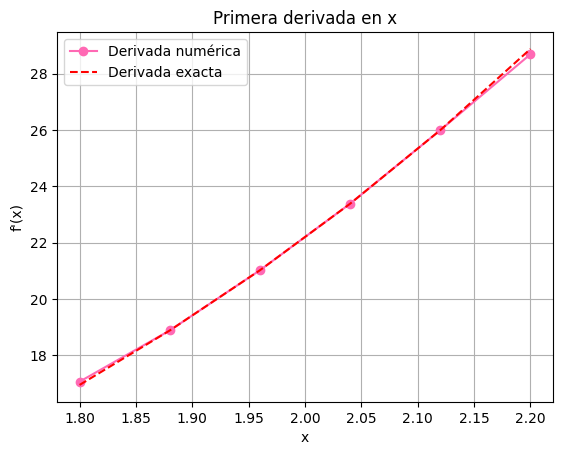

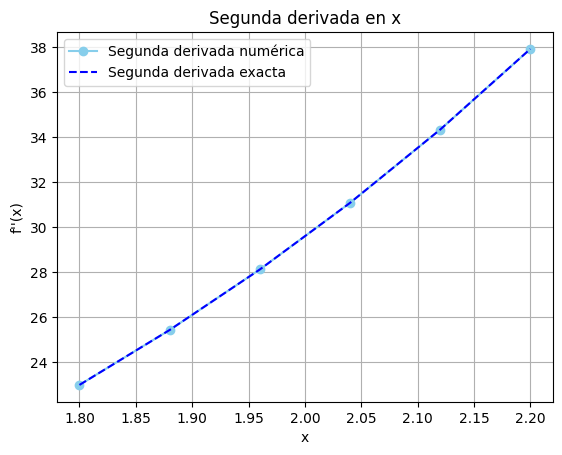

In [39]:
# Función y derivadas exactas
f = lambda x: x * np.exp(x)
df_exacta = lambda x: np.exp(x) + x * np.exp(x)
d2f_exacta = lambda x: 2 * np.exp(x) + x * np.exp(x)

x = np.linspace(1.8, 2.2, 6)
h = 0.01

# Derivadas numéricas
df_num_ = Diferencias_Finitas(f, h)
df_num = df_num_(x)

d2f_num = second_diff(f, x, h)

# Derivadas exactas evaluadas
df_exacta_vals = df_exacta(x)
d2f_exacta_vals = d2f_exacta(x)

# Gráfico de la primera derivada
plt.plot(x, df_num, 'o-', label='Derivada numérica', color='hotpink')
plt.plot(x, df_exacta_vals, '--', label='Derivada exacta', color='red')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.title('Primera derivada en x')
plt.grid()
plt.legend()
plt.show()

# Gráfico de la segunda derivada
plt.plot(x, d2f_num, 'o-', label='Segunda derivada numérica', color='skyblue')
plt.plot(x, d2f_exacta_vals, '--', label='Segunda derivada exacta', color='blue')
plt.xlabel('x')
plt.ylabel('f\'\'(x)')
plt.title('Segunda derivada en x')
plt.grid()
plt.legend()
plt.show()

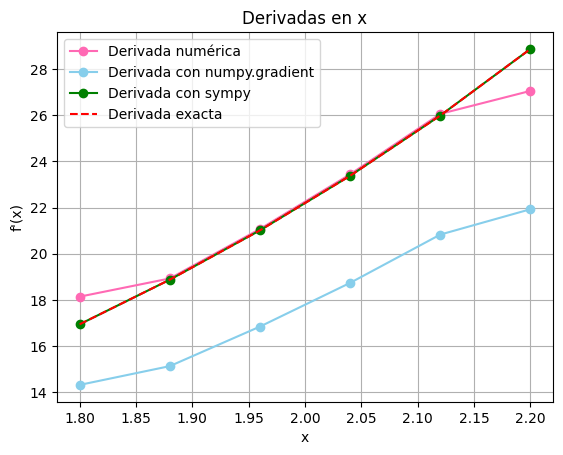

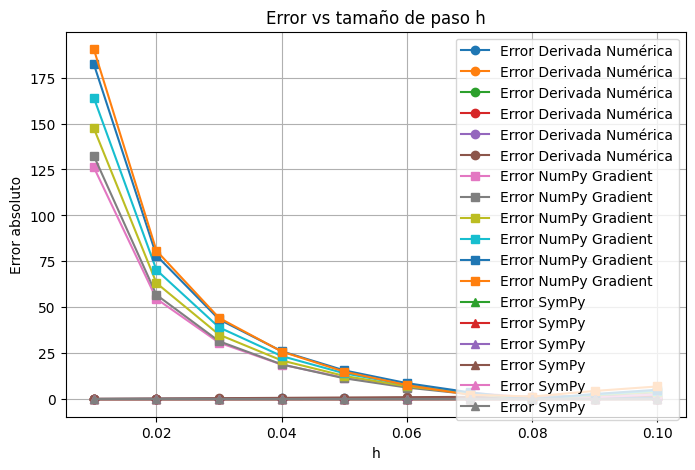

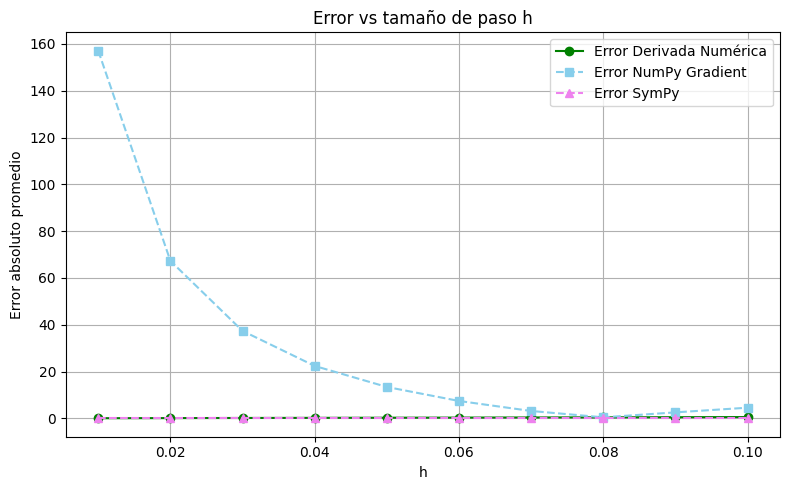

In [40]:
#Cambiando los valores de h:
f = lambda x: x * np.exp(x)
df_exacta = lambda x: np.exp(x) + x * np.exp(x)

x = np.linspace(1.8, 2.2, 6)
h = 0.01
h_values = np.linspace(0.01, 0.1, 10)

# Listas para guardar errores
errores_df = []
errores_np_grad = []
errores_sym = []
errores_df_ = []
errores_np_grad_ = []
errores_sym_= []

for h in h_values:
  # Derivadas numéricas
  df_num_ = Diferencias_Finitas(f, h)
  df_num = df_num_(x)

  # Derivada con numpy.gradient
  df_np = np.gradient(f(x), h)

  #Derivada con sympy
  x_sym = sp.Symbol('x')
  f_sym = x_sym * sp.exp(x_sym)
  df_sym = sp.diff(f_sym, x_sym)
  df_sym_func = sp.lambdify(x_sym, df_sym, 'numpy')
  df_sym_vals = df_sym_func(x)

  # Derivada exacta
  df_ex = df_exacta(x)

  # Errores
  errores_df.append(abs(df_num - df_ex))
  errores_np_grad.append(abs(df_np - df_ex))
  errores_sym.append(abs(df_sym_vals - df_ex))

  # Errores como promedio absoluto
  errores_df_.append(np.mean(np.abs(df_num - df_ex)))
  errores_np_grad_.append(np.mean(np.abs(df_np - df_ex)))
  errores_sym_.append(np.mean(np.abs(df_sym_vals - df_ex)))

#Grafica de las derivadas
plt.plot(x, df_num, 'o-', label='Derivada numérica', color='hotpink')
plt.plot(x, df_np, 'o-', label='Derivada con numpy.gradient', color='skyblue')
plt.plot(x, df_sym_vals, 'o-', label='Derivada con sympy', color='green')
plt.plot(x, df_ex, '--', label='Derivada exacta', color='red')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.title('Derivadas en x')
plt.grid()
plt.legend()
plt.show()

#Grafica de los errores
plt.figure(figsize=(8,5))
plt.plot(h_values, errores_df, 'o-', label='Error Derivada Numérica')
plt.plot(h_values, errores_np_grad, 's-', label='Error NumPy Gradient')
plt.plot(h_values, errores_sym, '^-', label='Error SymPy')
plt.xlabel('h')
plt.ylabel('Error absoluto')
plt.title('Error vs tamaño de paso h')
plt.grid()
plt.legend()
plt.show()

# Gráfica de errores absolutos
plt.figure(figsize=(8,5))
plt.plot(h_values, errores_df_, 'o-', label='Error Derivada Numérica', color='green')
plt.plot(h_values, errores_np_grad_, 's--', label='Error NumPy Gradient', color='skyblue')
plt.plot(h_values, errores_sym_, '^--', label='Error SymPy', color='violet')
plt.xlabel('h')
plt.ylabel('Error absoluto promedio')
plt.title('Error vs tamaño de paso h')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
#El h óptimo será el h que hace que el valor del error sea mínimo
#En la gráfica sería más o menos 0.08